**Aim**

---

Aim was to build a graph convolutional neural network that classifies peptides based on if they had anti microbial properties. Used the paper below to help build the model:

[1] Ruiz Puentes, P.; Henao, M.C.; Cifuentes, J.; Muñoz-Camargo, C.; Reyes, L.H.; Cruz, J.C.; Arbeláez, P. Rational Discovery of Antimicrobial Peptides by Means of Artificial Intelligence. Membranes 2022, 12, 708. https://doi.org/10.3390/membranes12070708



**Summary**

---

There were 3 different parts to acheiving the aim we had set. The first part was reading in the data and converting that data into graph form. This included retrieving node features, features and adjacency matrix. The second part was grouping the data into batches and collating the list into tensors. This was done through the use of the DataLoader class. The final part was creating the model and finding the right hyperparameters to maximise accuracy. 

Our final model was trained with a learning rate of 5e-5, a batch size of 3, 50 epochs, and an updated node feature vector dimension of 16, resulting in an accuracy of 78.9% and a precision of 84.7%.

**Code Description**

---
Let x_ be the node features, A_ be the adjacency matrix, e_ the node features, y_ the labels and m_ the metadata vector.

**Fasta sequence ----> Graph**

The csv file called AllData.csv contains data on around 20,000 peptides. Each row in the csv file contain a fasta sequence,an antimicrobial label and metadata for a peptide. We used smiles_to_graph() to get x_ , e_ and A_ from each peptides fasta sequence. We created a numpy array of spektral graph objects using create_AMP_Dataset(). This loops over every row in the csv file and creates a graph object which contains x_, e_, A_, y_, m_ and the fasta sequence. create_AMP_Dataset() excludes peptides whos graphs have more than 600 nodes.

**Shuffling and splitting dataset**

To make sure our model doesnt have bias based on the ordering of the peptides in the dataset we first shuffled the dataset. Then split the data so that we had 80% train, 10% validation, 10% test.

**Creating a data loader to convert the list of graph objects to tensors that we can feed into the model**

The input layers in keras takes in batches of tensors where tensors in each batch are of the same size. The data we have so far are spektral graph objects that contain x_, e_, m_, y_ as numpy arrays and A_ as a scipy sparse matrix. We created a DataLoader class to iterate over the list of graphs and yield batches of tensors to feed into the Keras model. Inside the DataLoader there is a generator object "batch_generator()" that produces lists of Graphs, which are then collated together and returned as Tensors using the "collate(batch)" function. "collate(batch)" takes as input a batch of Graph objects and returns a list of Tensors.

**Creating the keras model and the layers used**

Our GCN model consists of input layers for x_, e_, A_, m_ which is followed by the ECCConv convolutional layer. The convolutional layer takes in x_, e_ and A_. The layer outputs updated node features, call this x_out. x_out is then fed into a batch normalization layer and then a dropout layer. After the dropout layer there is a global sum pool layer. Global pooling layers are used to aggregate the feature representations of all the nodes in the graph into a single vector. The single vector produced from the pooling layer is then passed into a linear classifier. This consists of 2 dense layers, the first layer outputs a 32D vector, the second outputs a scalar. This scalar determines the probability the peptide has anti-microbial peptides.

**Training the model**
After we built the model we trained the model multiple times whilst tuning the hyperparameters. We found the best accuracy with a learning rate of 5e-5, batch size of 5, epochs=50 and the updated feature vector dimension equal to 16. The final accuracy we obtained was 78.9% with a precision of 84.7%.

**Limitations**

---

The paper used Pytorch as the machine learning library and Pytorch Geometric as the graph library. We used Tensorflow and Spektral libraries. We were only able to recreate the first half of AMPs-Net mentioned in the paper. Also we had to use ECCConv as our convolutional layer instead of GENConv which they used. This is because we couldnt access it through the graph library we were using. 

GENConv source code: https://github.com/lightaime/deep_gcns_torch/blob/master/gcn_lib/sparse/torch_vertex.py

GENConv paper: Li, G.; Xiong, C.; Thabet, A.; Ghanem, B. DeeperGCN: All You Need to Train Deeper GCNs. https://arxiv.org/pdf/2006.07739.pdf

ECCConv source code: https://github.com/danielegrattarola/spektral/blob/master/spektral/layers/convolutional/ecc_conv.py#L12

ECCConv paper: Simonovsky, M. ;Komodakis, N. Dynamic Edge-Conditioned Filters in Convolutional Neural Networks on Graphs. https://arxiv.org/abs/1704.02901

We had limited access to high performance gpus so we had to adjust some hyperparameters to decrease run time. This was done to run the model in a reasonable amount of time and to stop it encountering out of memory (OOM) errors.

The dimensions of the updated graph in our model is 16 whilst in their model its 256. Our model had only 1 Convolutional layer whilst they had 25. Our batch size was around 5 theirs 112. The number of epochs we had was 50 whilst they had 160. We experienced OOM errors when we tried increasing the batch size to values greater than one. As a result of this we removed peptides whos graphs had more than 600 nodes. This meant around 919 peptides where excluded from the training process.

**Results**

---

The greatest accuracy our model reached was 78.9% with an average precision of 84.7%. Paper [1] model had an accuracy of 89.81% with a precision of 95.76%. Our results are similar to the accuracy of 75.07% with precision 86.96% obtained in the paper below:

[2] Li, C.; Sutherland, D.; Hammond, S.A.; Yang, C.; Taho, F.; Bergman, L.; Houston, S.; Warren, R.L.; Wong, T.; Hoang, L.M.N.; et al. AMPlify: Attentive deep learning model for discovery of novel antimicrobial peptides effective against WHO priority pathogens. BMC Genom. 2022, 23, 77. [[Google Scholar]](https://scholar.google.com/scholar_lookup?title=AMPlify:+Attentive+deep+learning+model+for+discovery+of+novel+antimicrobial+peptides+effective+against+WHO+priority+pathogens&author=Li,+C.&author=Sutherland,+D.&author=Hammond,+S.A.&author=Yang,+C.&author=Taho,+F.&author=Bergman,+L.&author=Houston,+S.&author=Warren,+R.L.&author=Wong,+T.&author=Hoang,+L.M.N.&publication_year=2022&journal=BMC+Genom.&volume=23&pages=77&doi=10.1186/s12864-022-08310-4)

This paper ([2]) was referenced in paper [1] when they compared their accuracy with other current AMP classification models. 

# Project Description

# Setup

**Python library reference**

---

Spektral: https://graphneural.network/

Tensorflow: https://www.tensorflow.org/guide

Keras: https://keras.io/api/

rdkit: https://www.rdkit.org/docs/GettingStartedInPython.html

pandas: https://pandas.pydata.org/docs/reference/index.html

pickle: https://docs.python.org/3/library/pickle.html#data-stream-format

sklearn: https://scikit-learn.org/stable/modules/classes.html

ogb: https://ogb.stanford.edu/docs/home/ , https://github.com/snap-stanford/ogb/blob/master/ogb/utils/features.py

matplotlib: https://matplotlib.org/stable/api/index.html

csv: https://docs.python.org/3/library/csv.html

style guide: https://google.github.io/styleguide/pyguide.html

In [ ]:
# Installing packages
from IPython.display import clear_output 
! pip install spektral
! pip install rdkit
! pip install ogb

clear_output()

In [ ]:
#Jupyter Installation 

!pip install jupyterlab
!pip install jupyter_http_over_ws
!jupyter serverextension enable --py jupyter_http_over_ws

!jupyter notebook \ 
    !--NotebookApp.allow_origin='https://colab.research.google.com' \ 
    !--port=8888 \ 
    !--NotebookApp.port_retries=0

IndentationError: ignored

In [ ]:
"""
There are 2 ways for the code to access the data. The first way mounts your google
 drive and then reads the data from there. The second way requires you to upload
 AllData.csv directly.

First method:
Replace the base path with your own path in your drive.The path should lead to a
 folder, preferably called "Data", this is where AllData.csv should be already.
"""

from google.colab import drive
import os
drive.mount("/content/drive")
base_path = "/content/drive/My Drive/MPHYS_Shared_folder/Our_Peptide_GCN/Data/" #Jussi's paths
data_path = base_path + "AllData.csv"
dataset_path = base_path + "AMP_Dataset.pickle"
model_run_path = base_path + "model_runs"

if not os.path.isdir(model_run_path):
    os.mkdir(model_run_path)
save_path = base_path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""
Second method:
First download Alldata.csv from here:
https://drive.google.com/file/d/1vQDNZJ1ngW98iwl9sqMMCo4Y1lFLfjeq/view?usp=sharing
Then run the code below. Make sure to upload the downloaded Alldata.csv using the
button at the output.
"""
from google.colab import files
uploaded = files.upload()
base_path = "/content/"
data_path = base_path + "AllData.csv"
dataset_path = base_path + "AMP_Dataset.pickle"
model_run_path = base_path + "model_runs"

if not os.path.isdir(model_run_path):
    os.mkdir(model_run_path)
save_path = base_path

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


Before running the main code. Run the section below



# Collapse this section and run

Dataset Functions

In [ ]:
import numpy as np
import csv
import pandas as pd
import scipy
from scipy.sparse import csr_matrix
import pickle
from sklearn.model_selection import KFold
from rdkit import Chem
from ogb.utils.features import (atom_to_feature_vector, bond_to_feature_vector)
import spektral
from spektral.data import Dataset
import tensorflow as tf


def read_file(name_file):
    """
    Reads csv file given its file path and returns a pandas dataframe. The csv 
    file should contain data on peptides.

    Args:
        name_file (str)
      
    Returns:
        data_file (pandas dataframe)
    """

    All_data = {'Sequence': [], 'Label': [], 'AM-Activity':[], 'Size':[],
                'BomanI':[], 'NetCharge':[] ,'HydrophobicRatio':[],
                'HydrophobicMoment':[], 'Aliphatic':[], 'InstaIndex':[],
                'IsoelectricPoint':[]
                }
    with open(name_file) as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
                All_data['Sequence'].append(row['Sequence'])
                All_data['Label'].append(int(row['Label']))
                All_data['AM-Activity'].append(row['Activity'])
                All_data['Size'].append(row['Size'])
                All_data['BomanI'].append(row['BomanI'])
                All_data['NetCharge'].append(row['NetCharge'])
                All_data['HydrophobicRatio'].append(row['HydrophobicRatio'])
                All_data['HydrophobicMoment'].append(row['HydrophobicMoment'])
                All_data['Aliphatic'].append(row['Aliphatic'])
                All_data['InstaIndex'].append(row['InstaIndex'])
                All_data['IsoelectricPoint'].append(row['IsoelectricPoint'])

    csv_file.close()
    data_file = pd.DataFrame.from_dict(All_data)
    return data_file

def smiles_to_graph(smiles_string):
    """Converts SMILES string to a graph

    Args:
        smiles_string (str)
    
    Returns:
        node_features_np (numpy array)
        edge_features_np (numpy array)
        adjacency_matrix_csr (sparse scipy matrix)
    """

    # Use rdkit.Chem.MolFromFasta() to convert the fasta sequence to molecule object
    molecule_object = Chem.MolFromFASTA(smiles_string)
    if molecule_object == None:
        print(smiles_string)
        print('Invalid smile')
        breakpoint()

    # Getting the node (atom) features from the molecule object
    node_features_list = []
    for atom in molecule_object.GetAtoms():
        ftrs = atom_to_feature_vector(atom)
        node_features_list.append(ftrs)
    node_features_np = np.array(node_features_list, dtype = np.float32)

    # Getting the edge (bond) features and adjacency matrix from the molecule object
    num_bond_features = 3  # bond type, bond stereo, is_conjugated
    if len(molecule_object.GetBonds()) > 0: # mol has bonds
        edge_features_list = []
        edges_list = []
        for bond in molecule_object.GetBonds():
            i = bond.GetBeginAtomIdx()
            j = bond.GetEndAtomIdx()
            edge_feature = bond_to_feature_vector(bond)

            # Add edges in both directions.
            edges_list.append((i,j))
            edge_features_list.append(edge_feature)
            edges_list.append((j,i))
            edge_features_list.append(edge_feature)

        # Adjacency matrix has shape [num_nodes, num_nodes]
        adjacency_matrix_np = np.array(edges_list, dtype = np.float32)

        # Edge features has shape [num_edges, num_edge_features]
        edge_features_np = np.array(edge_features_list, dtype = np.float32)
        
        # Details on spektrals required format: https://graphneural.network/getting-started/#graphs
        # Reorder the edge features and adjacency matrix to fit spektrals required format
        adjacency_matrix_np, edge_features_np = spektral.utils.reorder(
            adjacency_matrix_np, edge_features=edge_features_np)
        
        # Change the dense adjacency numpy matrix into a sparse scipy matrix to fit spektrals required format
        adjacency_matrix_csr = csr_matrix(
            ([1.0 for num in range(len(adjacency_matrix_np))], 
             (adjacency_matrix_np[:,0], adjacency_matrix_np[:,1])),
             shape=(len(node_features_np), len(node_features_np))
             , dtype=np.float64
             )

    return edge_features_np, adjacency_matrix_csr, node_features_np

#Create a dataset
def create_AMP_Dataset(data_path):
  """Returns list of Spektral graph objects

  Reads csv file and stores the data in a pandas dataframe. The rows in the csv 
  file contain a fasta sequence,an antimicrobial label and metadata for a 
  peptide. This function converts each row in the dataframe into a graph that 
  represents the corresponding peptide.

  Returns:
      peptide_graphs (numpy array): Numpy array of Spektral graph objects
  """
  data = read_file(data_path)
  peptide_graphs = []

  # Loop through all rows in the csv
  for idx in range(len(data)):

    # Getting metadata vector from the csv
    metadata_criteria = [
        'Size','BomanI','NetCharge','HydrophobicRatio','HydrophobicMoment',
        'Aliphatic','InstaIndex','IsoelectricPoint'
        ]
    metadata=[]
    for i in metadata_criteria:
      try:
        metadata.append(float(data[i].iloc[idx]))
      except:
        pass
    
    # Only use the sequence if the fasta sequence have a metadata vector associated with them
    if len(metadata) == 8:
      mol=data.Sequence.iloc[idx]
      y = [data.Label.iloc[idx]]
      e, a, x = smiles_to_graph(mol)
      graph = spektral.data.graph.Graph(
          x, a, e, y, metadata=metadata, fasta=mol
          )
      peptide_graphs.append(graph)

  # Return a list of spektral graph objects
  return np.array(peptide_graphs)

def save_variable(variable, save_path):
    """Saves a variable to file system.

    Args:
        variable (var)
        save_path (str): Path to save the dataset variable to 
    """
    with open(save_path, 'wb') as f:
        pickle.dump(variable, f, pickle.HIGHEST_PROTOCOL)
    return None

def load_variable(load_path):
    """Loads a variable from the file system.

    Args:
        load_path (str): File path that leads to a variable
    """
    with open(load_path, "rb") as f:
        variable = pickle.load(f)
    return variable

def filter_dataset(dataset, max_node_num, **kwargs):
    """Removes graphs which have more nodes than max_node_num

    Args:
        dataset (numpy array): Numpy array containing spektral graph objects.
        max_node_num (int): Max number of nodes the graphs should have.
    """
    dataset_out = []
    excluded_peptides = []
    for i, graph in enumerate(dataset):
        if len(graph.x) < max_node_num:
            dataset_out.append(graph)
        else:
            excluded_peptides.append(graph)
    return np.array(dataset_out), np.array(excluded_peptides)


def k_fold_AMP_Dataset(dataset, splits=5):
    """Return indices which could be used for k-fold cross validation.
    
    Args:
        dataset (numpy array): Numpy array containing peptide dataset.
        splits (int): Number of splits to divide the dataset into
    
    Returns:
        train_folds (list): List that contain lists which contain indicies for 
          each train partition splits.
        test_folds (list): List that contain lists which contain indicies for 
          each test partition splits.
    """
    k_fold = KFold(n_splits=splits)
    train_folds = []
    test_folds = []
    for train_indices, test_indices in k_fold.split(dataset):
        train_folds.append(train_indices)
        test_folds.append(test_indices)
    return train_folds, test_folds


Data Loader Functions


In [ ]:
from spektral.utils import pad_jagged_array
from spektral.data.utils import sp_matrices_to_sp_tensors
from spektral.data.utils import batch_generator


def graph_to_tuple(graph):
    """Converts a graph object into a tuple. 
    Copied from spektral source code.

    Args:
        graph (Spektral.data.graph.Graph)
    
    Returns:
        tuple (tuple): The input graph but as a tuple
    """
    return tuple([graph.x, graph.a, graph.e, graph.metadata, graph.y])

def pack(batch):
    """Converts graph objects to dictionary of lists of each argument.
    Copied from spektral source code.

    Args:
        batch (list): List of graphs objects.
    
    Returns:
        dict (dict): Dictionary which contain node features, edge features, 
          adjacency matrix, metadata vector and labels
    """
    output = [list(elem) for elem in zip(*[graph_to_tuple(g) for g in batch])]
    keys = ["x_list", "a_list", "e_list", "metadata", "y_list" ]
    return dict(zip(keys, output))

def to_batch(x_list=None, a_list=None, e_list=None, metadata=None, mask=False):
    """Pads list of arrays such that they have then same size for each batch.
    Copied from spektral source code.

    Args:
        x_list (list)
        a_list (list)
        e_list (list)
        metadata (list)
        mask (boolean)
    """
    if a_list is None and x_list is None:
        raise ValueError("Need at least x_list or a_list")
    
    # Max number of nodes in the node features list
    n_max = max([x.shape[0] for x in (x_list if x_list is not None else a_list)])

    # Node features
    x_out = None
    if x_list is not None:
        x_out = pad_jagged_array(x_list, (n_max, -1))

    # Adjacency matrix
    a_out = None
    if a_list is not None:
        if hasattr(a_list[0], "toarray"):  # Convert sparse to dense
            a_list = [a.toarray() for a in a_list]
        a_out = pad_jagged_array(a_list, (n_max, n_max))

    # Edge attributes
    e_out = None
    if e_list is not None:
        if e_list[0].ndim == 2:  # Sparse to dense
            for i in range(len(a_list)):
                a, e = a_list[i], e_list[i]
                e_new = np.zeros(a.shape + e.shape[-1:])
                e_new[np.nonzero(a)] = e
                e_list[i] = e_new
        e_out = pad_jagged_array(e_list, (n_max, n_max, -1))

    # Metadata
    metadata_out = tf.convert_to_tensor([metadata], dtype=tf.float32)
    return tuple(out for out in [x_out, a_out, e_out, metadata] if out is not None)

def collate(batch):
    '''This takes as input a list of Graph objects and returns a list of 
    Tensors.

    Args:
        batch (list): List of graph objects.
    Returns:
        output (tuple): Node features, edge features, adjacency matrix, metadata
          vector.
        y (int): Label.
    '''
    packed = pack(batch)
    y = packed.pop("y_list", None)
    if y is not None:
        y = np.array(y)
    output = to_batch(**packed, mask=False)
    output = sp_matrices_to_sp_tensors(output)
    x, a,e, m = output
    m = tf.convert_to_tensor(m, dtype=tf.float32)
    output = x, a, e, m
    if len(output) == 1:
        output = output[0]
    if y is None:
        return output
    else:
        return output, y

class Data_Loader:
    '''
    Converts the numpy array of graph objects to a generator object which can be
    passed into the keras model. 
    Works like:  https://graphneural.network/loaders/#batchloader but adjusted 
    so we could feed in the metadata for each peptide into the model.
    '''
    def __init__(self, dataset, batch_size=1, epochs=None):
        """
        """
        self.dataset = dataset
        self.batch_size = batch_size
        self.epochs = epochs
        self._generator = self.generator()
        self.steps_per_epoch = int(np.ceil(len(self.dataset) / self.batch_size))

    def __iter__(self):
        return self

    def __next__(self):
        """
        """
        nxt = self._generator.__next__()
        return collate(nxt)

    def generator(self):
        """
        """
        return batch_generator(
            self.dataset,
            batch_size=self.batch_size,
            epochs=self.epochs,
            shuffle=False,
            )

    def load(self):
      return self

Building, Training & Evaluating Model Functions

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization, Concatenate
import spektral
from spektral.data import Dataset
from spektral.data import DisjointLoader
from spektral.layers import ECCConv, GlobalSumPool
import sklearn
import csv


def create_model(learning_rate=1e-3, updated_x_dims=16, conv_layers=1, dropout_rate=0.5, **kwargs):
    """Creates a GCN which classifies anti microbial peptides.

    Args:
          learning_rate (float): Learning rate of Adam optimizer.
          updated_x_dims (int): ECCConv output channel size.
          conv_layers (int): Amount of ECCConv layers in the model.
    
    Returns:
          model (Keras model)
    """

    X_in = Input(shape=(None, 9), name='Node Features')
    A_in = Input(shape=(None, None, ),  name='Adjacency Matrix')
    E_in = Input(shape=(None, None, 3), name='Edge Features')
    M_in = Input(shape=(8), name='Metadata')
    out = X_in
    for k in range(conv_layers):
      out = ECCConv(updated_x_dims, activation="relu")([out, A_in, E_in])
      out = BatchNormalization()(out)
    out = Dropout(dropout_rate, name='Dropout')(out)
    
    out = GlobalSumPool()(out)
    out = Concatenate()([out, M_in])
    out = Dense(32, activation="sigmoid")(out)
    out = Dense(1, activation="sigmoid")(out)

    model = Model(inputs=[X_in, A_in, E_in, M_in], outputs=out)
    optimizer = Adam(learning_rate)
    loss_fn = BinaryCrossentropy()
    model.compile(optimizer, loss_fn,
                  metrics=['accuracy', 
                           tf.keras.metrics.Precision(name="precision"),
                           tf.keras.metrics.AUC(name="AUC")]) 
    return model


def train_model(model, train_data, validation_data, epochs=30, batch_size=1, callbacks=None, **kwargs):
    """Trains GCN model on a dataset of peptide graphs.

    Args:
        model (Keras model): GCN model to train
        train_data (numpy array): Numpy array containing spektral graph objects
          that represent the peptides.
        epochs (int): Number of epochs to train the model for.
        batch_size (int): The number of graphs to fit into one batch.

    Returns:
        history (array): List of metrics recorded for the model
    """
    train_loader = Data_Loader(train_data, batch_size=batch_size, epochs=epochs)
    validation_loader = Data_Loader(validation_data, batch_size=batch_size, epochs=epochs)
    history = model.fit(train_loader, validation_data=validation_loader,
                        steps_per_epoch=train_loader.steps_per_epoch,
                        validation_steps=validation_loader.steps_per_epoch,
                        epochs=train_loader.epochs,
                        callbacks=callbacks, verbose=1)
    return history

def evaluate_model(model, test_data, batch_size=1, **kwargs):
    """Returns metrics after evaluating the model on test data

    Args:
        model (Keras model): GCN model to evaluate.
        test data (Numpy array): Numpy array containing spektral graph objects
          that represent the peptides.
        batch size (int): Number of graphs for each batch.

    Returns:
        results (list): list of metrics from evaluation.
    """
    loader = Data_Loader(test_data, batch_size=batch_size, epochs=1)
    results =  model.evaluate(loader, batch_size=batch_size)
    return results

def get_confusion_matrix(model, data):
    """Return confusion matrix of a model trained on a dataset

    Args:
        model (Keras model): GCN model to train
        data (numpy array): Numpy array containing spektral graph objects
          that represent the peptides.

    Returns:
        confusion_matrix (array): Confusion matrix of model with dataset.
    """
    data_loaded = Data_Loader(data, batch_size=1, epochs=1)
    predictions = np.round(model.predict(data_loaded))
    data_reloaded = Data_Loader(data, batch_size=1, epochs=1) # Reset the generator
    actual_values = [g[1][0][0] for g in data_reloaded]
    confusion_matrix = sklearn.metrics.confusion_matrix(actual_values, predictions)
    return confusion_matrix



Visualising model metric Functions

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpl_patches
import seaborn as sns
from math import floor
from matplotlib import pyplot as plt

def plot_metric(metric, axes, history, colour):
    """Plots a metric of the model using history
    """
    epoch_number = np.arange(1, len(history.history["accuracy"]) + 1, 1)
    axes.plot(epoch_number, history.history[metric], color=colour, label="train " + metric)
    axes.plot(epoch_number, history.history["val_"+metric], color="grey", label="validation " + metric)
    axes.legend()
    axes.xaxis.set_ticks(epoch_number)
    axes.set_ylabel(metric)
    axes.set_xlabel('epoch')
    axes.xaxis.set_major_locator(plt.MaxNLocator(11))
    midpoint = 0.5 * (axes.get_ylim()[1] + axes.get_ylim()[0])
    final_value = f'{float(f"{history.history[metric][-1]:.3g}"):g}'
    axes.text(axes.get_xlim()[1], midpoint, "Final train " + metric + ": " + final_value, horizontalalignment='right' )
    return axes


def plot_metrics_of_model(history, title):
    """Plots all metrics of the model from the history.
    """
    fig, ax = plt.subplots(2, 2, figsize=(15, 7.5), constrained_layout=True)
    epoch_number = len(history.history["accuracy"])
    fig.suptitle(title + " (epochs=" + str(epoch_number) + ")", fontsize=16)
    
    
    # plotting accuracy, loss, precision, AUC against epochs
    plot_metric('loss', ax[0][0], history, "red")
    plot_metric('accuracy', ax[0][1], history, "blue")
    plot_metric("precision", ax[1][0], history, "green")
    plot_metric("AUC", ax[1][1], history, "orange")
    return fig, ax


def plot_confusion_matrix(confusion_matrix):
    """Plots confusion matrix"""
    cm_fig = sns.heatmap(confusion_matrix,annot=True, cmap='Reds', fmt='d');
    cm_fig.set(xlabel='Predicted', ylabel='Actual', title='Confusion Matrix');
    return cm_fig



    

Saving Results Functions

In [ ]:
import os
import pandas as pd
def get_save_path(model_config, base_path):
    model_run_path = base_path + "model_runs"
    save_path = base_path
    if not model_config["run_name"] == "":
        save_path = model_run_path + "/" + model_config["run_name"] 
        if not os.path.isdir(save_path):
            os.mkdir(save_path)
        save_path = save_path  + "/" + model_config["run_name"]
    return save_path

def save_model_config(model_config, save_path):
    model_config_save_path = save_path + "_model_config.txt"
    with open(model_config_save_path, 'w') as f:
        for x in model_config:
            f.write(str(x) + " : " +str(model_config[x]))
            f.write('\n')
    return None

def predict_on_dataset(model, dataset):
    loaded_dataset = Data_Loader(dataset, batch_size=1, epochs=1)
    predictions = model.predict(loaded_dataset)
    results = {
        'Sequence': [g.fasta for g in dataset],
        'Label': [g.y[0] for g in dataset], 
        'GCN_Prediction': [p[0] for p in predictions],
        'Size':[g.metadata[0] for g in dataset],
        'BomanI':[g.metadata[1] for g in dataset], 
        'NetCharge':[g.metadata[2] for g in dataset] ,
        'HydrophobicRatio':[g.metadata[3] for g in dataset],
        'HydrophobicMoment':[g.metadata[4] for g in dataset], 
        'Aliphatic':[g.metadata[5] for g in dataset], 
        'InstaIndex':[g.metadata[6] for g in dataset],
        'IsoelectricPoint':[g.metadata[7] for g in dataset]
        }
    results_pandas_dataframe = pd.DataFrame.from_dict(results)
    return results_pandas_dataframe

def save_model_predictions(results_pandas_dataframe, results_save_path):
    results_pandas_dataframe.to_csv(results_save_path,index=False)
    return None

def load_model_predictions(run_name):
    results_save_path =  base_path + "model_runs/" + run_name + "/" + run_name + "_results.csv"
    df = pd.read_csv(results_save_path)
    return df

# Training model

In [ ]:
# Create the dataset.
full_dataset = create_AMP_Dataset(data_path)
save_variable(full_dataset, dataset_path)

In [ ]:
# Or load the AMP_Dataset thats already been saved from a previous run.
full_dataset = load_variable(dataset_path)

<ipython-input-14-a6fe899d3042>:175: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  variable = pickle.load(f)


In [ ]:
# Change model hyperparameters here
# Lower dropout rate better for convolutional layers
model_config = {
    "run_name": "v run 3", # Change names on each run to save results
    "learning_rate":5e-4,
    "batch_size":12,
    "epochs":50,
    "updated_x_dims": 16,
    "max_node_num": 600,
    "dropout_rate": 0.3
    }

# If the run name is not blank then create a new directory to save results for this run.
save_path = get_save_path(model_config, base_path)
#save_model_config(model_config, save_path)

# Save paths to save results to.
model_save_path           = save_path + "_model.h5"
model_structure_save_path = save_path + "_model_structure.png"
metrics_save_path         = save_path + "_metrics.png"
confusion_matrix_save_path = save_path + "_confusion_matrix.png"
results_analysis_path = save_path + "_metadata_analysis"
if not os.path.isdir(results_analysis_path):
    os.mkdir(results_analysis_path)
results_save_path = save_path + "_results.csv"
history_save_path = save_path + "_history.csv"
metrics_log_save_path = save_path + "_metrics.csv"
csv_logger = tf.keras.callbacks.CSVLogger(metrics_log_save_path)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_save_path,
    mode='max')

In [ ]:
# Filter dataset to remove peptides whose graphs have more than max_node_num nodes in them
dataset, excluded_peptides = filter_dataset(full_dataset, **model_config)

# Shuffle array of indices ranging from 0 to len(dataset)
np.random.seed(seed=0) # so that shuffled indices are the same for every run
permuted_indices = np.random.permutation(np.arange(len(dataset)))

# Train set: 80 % of data
train_index = permuted_indices[: int(len(dataset) * 0.8)]
train_data = dataset[train_index]

# Valid set: 10 % of data
valid_index = permuted_indices[int(len(dataset) * 0.8) : int(len(dataset) * 0.9)]
valid_data = dataset[valid_index]

# Test set: 10 % of data
test_index = permuted_indices[int(len(dataset) * 0.9) :]
test_data = dataset[test_index]

In [ ]:
print(len(excluded_peptides))

919


In [ ]:
# Creating model 
model = create_model(**model_config)

# Saving model structure
tf.keras.utils.plot_model(model, model_structure_save_path, show_shapes=True)

# Training model
metrics = train_model(model, train_data, valid_data, callbacks=[csv_logger, model_checkpoint], **model_config)
model.save(model_save_path);

Epoch 1/50
  40/1536 [..............................] - ETA: 5:08 - loss: 0.6917 - accuracy: 0.5979 - precision: 0.7077 - AUC: 0.6158

KeyboardInterrupt: ignored

In [ ]:
# loading the model and metricss from previous run (only use for analysis)
import pandas as pd
class history:
    history = []
    def __init__(self, h):
        self.history = h
#model = tf.keras.models.load_model(model_save_path, custom_objects={'ECCConv': ECCConv, "GlobalSumPool" : GlobalSumPool})
metrics = history(pd.read_csv(metrics_log_save_path).to_dict(orient="list"))

In [ ]:
# Evaluating model
evaluation = evaluate_model(model, test_data)

2304/2304 [==============================] - 19s 8ms/step - loss: 0.7164 - accuracy: 0.5430 - precision: 0.5418 - AUC: 0.5165


In [ ]:
# Confusion Matrix
confusion_matrix = get_confusion_matrix(model, test_data)
plot_confusion_matrix(confusion_matrix)
plt.savefig(confusion_matrix_save_path)

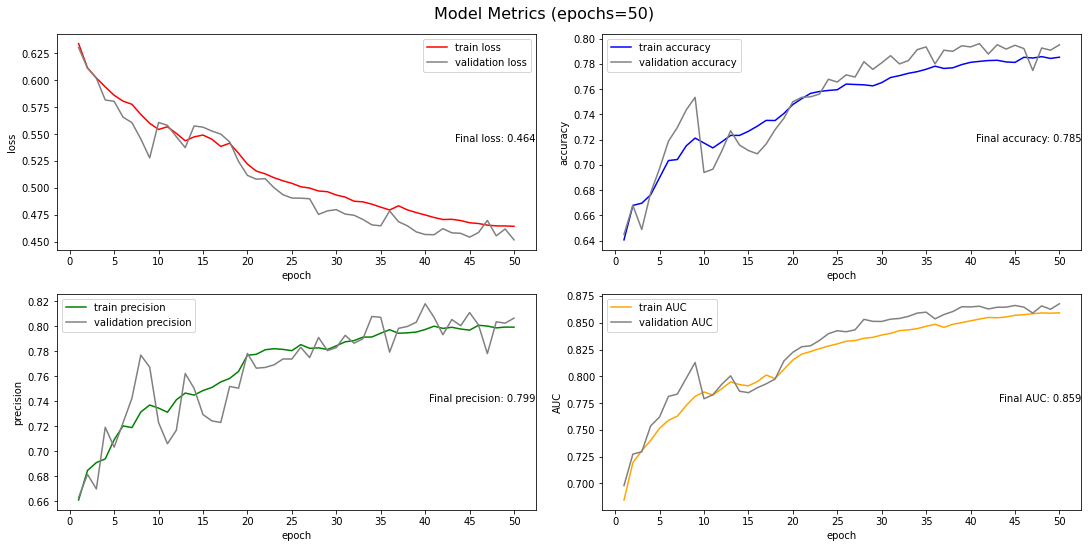

In [ ]:
from matplotlib import pyplot as plt
# Model Metrics
plot_metrics_of_model(metrics, "Model Metrics")
plt.savefig(metrics_save_path)

In [ ]:
# Saving the GCN prediction on the dataset to a csv.
results_pandas_dataframe = predict_on_dataset(model, dataset)
save_model_predictions(results_pandas_dataframe, results_save_path)

23039/23039 [==============================] - 98s 4ms/step


# Visualising Results Function

In [ ]:
from re import S
from locale import NOEXPR
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import math

def get_amp_values(df, metadata, label_type):
    non_amp_values = df[(df[label_type] <= 0.5)][metadata]
    amp_values = df[(df[label_type] >= 0.5)][metadata]
    return amp_values, non_amp_values

def plot_metadata_boxplot(df, metadata, ax1=None, ax2=None):
    fig = 0
    if ax1==None and ax2==None:
        fig,axes = plt.subplots(1, 2, figsize=(2*6.4, 4.8), constrained_layout=True)
        ax1= axes[0]
        ax2 = axes[1]

    # Getting labeled and predicted am values
    amp_labeled, non_amp_labeled = get_amp_values(df, metadata, "Label")
    amp_predicted, non_amp_predicted = get_amp_values(df, metadata, "GCN_Prediction")

    # Plotting box plots
    bp1 = ax1.boxplot([amp_labeled, non_amp_labeled], labels=["",""],
                      vert=False, patch_artist=True,widths = 0.8);
    bp2 = ax2.boxplot([amp_predicted, non_amp_predicted], labels=["",""],
                      vert=False, patch_artist=True,widths = 0.8);

    #  axes formating
    colors = ['C0', "C1"]
    for bplot in (bp1, bp2):
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
        plt.setp(bplot["medians"], color="black")
    max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
    ax1.set_ylim([0, max_y])
    ax2.set_ylim([0, max_y])
    ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax2.xaxis.set_minor_locator(AutoMinorLocator(5))

    output = ax1, ax2
    if ax1==None and ax2==None:
        ouput = fig, ax1, ax2
    return output


def plot_metadata_histogram(df, metadata, ax1=None, ax2=None):
    fig = 0
    if ax1==None and ax2==None:
        fig,axes = plt.subplots(1, 2, figsize=(2*6.4, 4.8), constrained_layout=True)
        ax1= axes[0]
        ax2 = axes[1]
    # Getting predicted and labeled antimicrobial values metadata
    amp_labeled, non_amp_labeled = get_amp_values(df, metadata, "Label")
    amp_predicted, non_amp_predicted = get_amp_values(df, metadata, "GCN_Prediction")

    # Setting size of bins
    bins = np.linspace(
        min(min(amp_labeled), min(non_amp_labeled), min(amp_predicted), min(non_amp_predicted)),
        max(max(amp_labeled), max(non_amp_labeled), max(amp_predicted), max(non_amp_predicted)),
        80)

    # Plotting histograms
    ax1.hist(amp_labeled, bins, alpha=0.5, label="Labeled" + ' AMP')
    ax1.hist(non_amp_labeled, bins, alpha=0.5, label="Labeled" + ' Non AMP')
    ax2.hist(amp_predicted, bins, alpha=0.5, label="Predicted" + ' AMP')
    ax2.hist(non_amp_predicted, bins, alpha=0.5, label="Predicted" + ' Non AMP')

    # Formatting axes
    max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
    ax1.set_ylim([0, max_y])
    ax2.set_ylim([0, max_y])
    ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right')
    ax1.set_xlabel(metadata)
    ax2.set_xlabel(metadata)
    ax1.set_ylabel("Frequency")
    ax2.set_ylabel("Frequency")
    
    output = ax1, ax2
    if ax1==None and ax2==None:
        ouput = fig, ax1, ax2
    return output


def plot_metadata_data(results_df, metadata_names, sub_plot_size=(6.4, 4.8)):
    df = results_df
    cols = 2
    rows = 2*len(metadata_names)
    fig_size = ((cols)*sub_plot_size[0], (rows)*sub_plot_size[1])
    height_ratios = []
    for i in range(rows):
        height_ratios.append([3,1][i%2])

    fig,axes = plt.subplots(rows, cols, figsize=fig_size, constrained_layout=True, gridspec_kw={'height_ratios': height_ratios })
    if len(metadata_names) != 1:
        fig.suptitle("Frequency of AMP & Non-AMPs", fontsize=16)
    else:
        fig.suptitle("Frequency of AMP & Non-AMPs for varying " + metadata_names[0], fontsize=16)

    for i, metadata in enumerate(metadata_names):
        start = 2*cols*i
        ax1 = fig.axes[start]
        ax2 = fig.axes[start+1]
        ax3 = fig.axes[start+2]
        ax4 = fig.axes[start+3]
        ax1, ax2 =plot_metadata_histogram(df, metadata, ax1=ax1, ax2=ax2)
        ax3, ax4 =  plot_metadata_boxplot(df, metadata, ax1=ax3, ax2=ax4)
        

def plot_bar_chart(values_1, values_2, labels, legend=["a", "b"],
                   title="", x_label="", y_label=""):
    ind = np.arange(len(labels))  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig = plt.figure()
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, values_1, width, color='red')
    rects2 = ax.bar(ind+width, values_2, width, color='blue')

    # add some
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels( labels )
    ax.legend( (rects1[0], rects2[0]), legend )



def plot_ammino_acid_distribution(resulst_pandas_dataframe, labels):
    cumulative = {}
    for i, fasta in enumerate(results_pandas_dataframe["Sequence"]):
        res = {}
        predicted_amp = round(results_pandas_dataframe[labels][i])
        for keys in fasta:
            if keys != "\n":
                if predicted_amp:
                    keys = keys + "_amp"
                keys = keys.upper()
                res[keys] = res.get(keys, 0) + 1
        for keys in res:
            res[keys] = res[keys]/len(fasta)
        x = res
        y = cumulative
        cumulative = {k: x.get(k, 0) + y.get(k, 0) for k in set(x) | set(y)}

    cumulative_amp = {}
    cumulative_non_amp = {}
    for keys in cumulative:
        cumulative[keys] /= len(results_pandas_dataframe["Sequence"])
        if len(keys) > 1:
            new_key = keys[0]
            cumulative_amp[new_key] = cumulative[keys]
        else:
            cumulative_non_amp[keys] = cumulative[keys]

    for key in cumulative:
        key = key[0]
        if key not in cumulative_amp:
            cumulative_amp[key] = 0.0
        if key not in cumulative_non_amp:
            cumulative_non_amp[key] = 0.0
        
    cumulative_amp= sorted(cumulative_amp.items())
    cumulative_non_amp= sorted(cumulative_non_amp.items())

    amp_values = [i[1] for i in cumulative_amp]
    non_amp_values = [i[1] for i in cumulative_non_amp]
    ammino_acid_labels = [i[0] for i in cumulative_amp]

    plot_bar_chart(amp_values, non_amp_values, ammino_acid_labels,
                  legend=["amp", "non amp"],
                   title="Ammino acid distribution from " + labels,
                   x_label="", y_label="")

    
    return amp_values, non_amp_values


# Analysing Results

In [ ]:
run_name = model_config["run_name"]
save_path =  base_path + "model_runs/" + run_name + "/" + run_name 
results_prediction_distributions_save_path = save_path+ "_prediction_distribution.png"
results_analysis_path = save_path + "_metadata_analysis"
if not os.path.isdir(results_analysis_path):
    os.mkdir(results_analysis_path)
results_pandas_dataframe = load_model_predictions(run_name)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

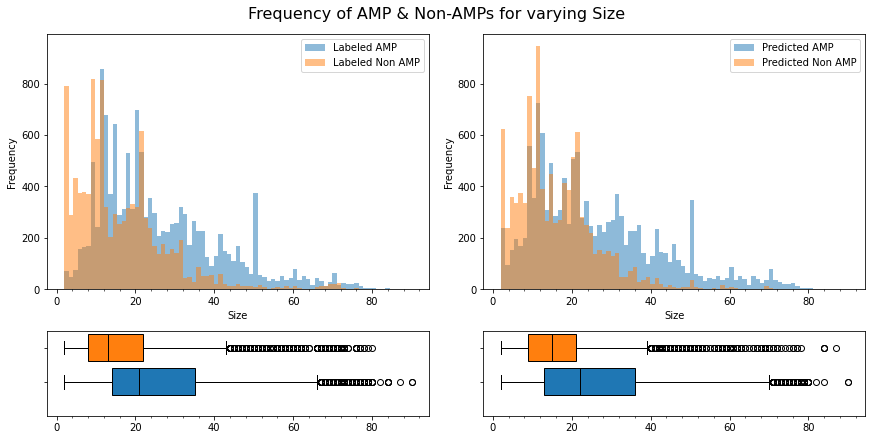

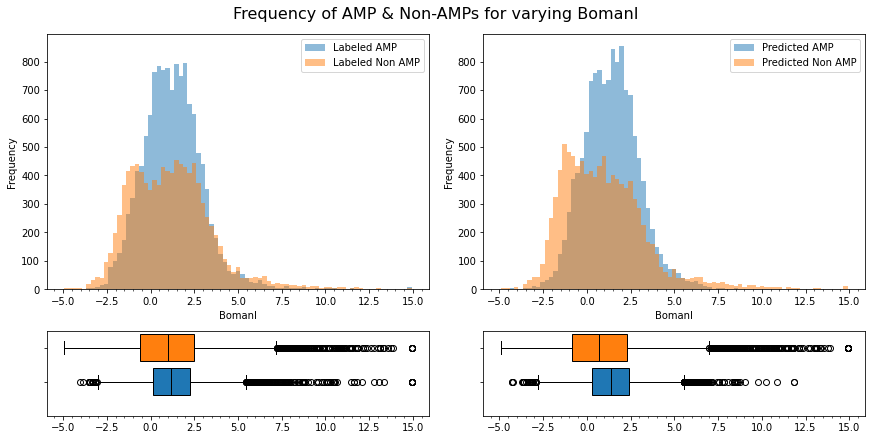

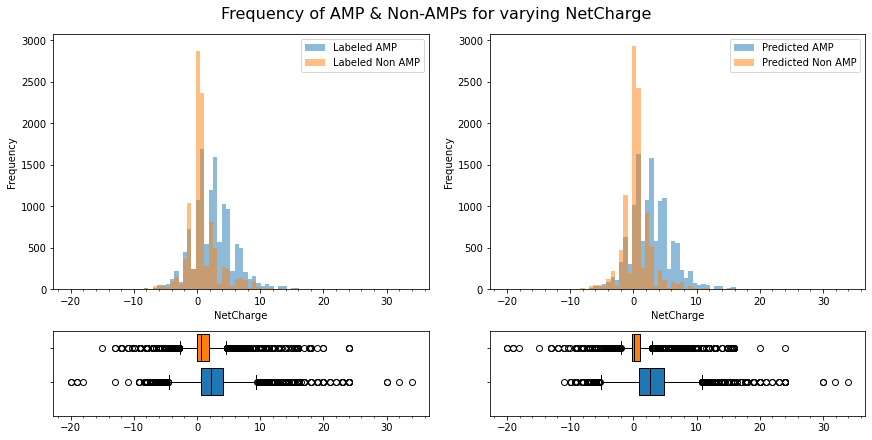

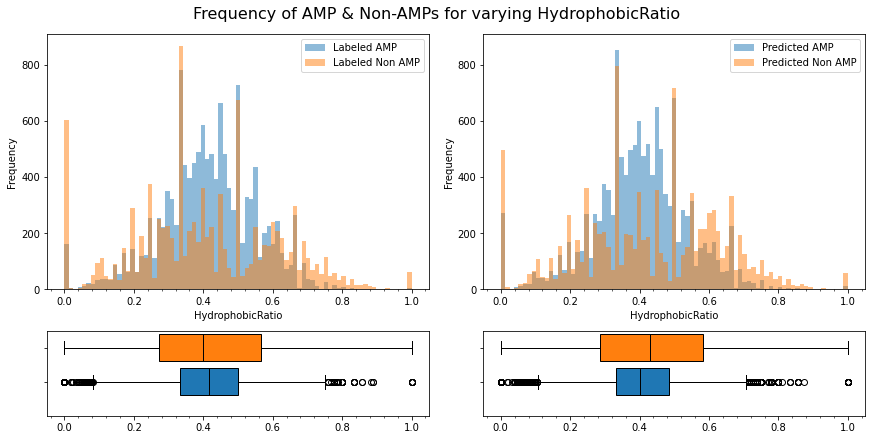

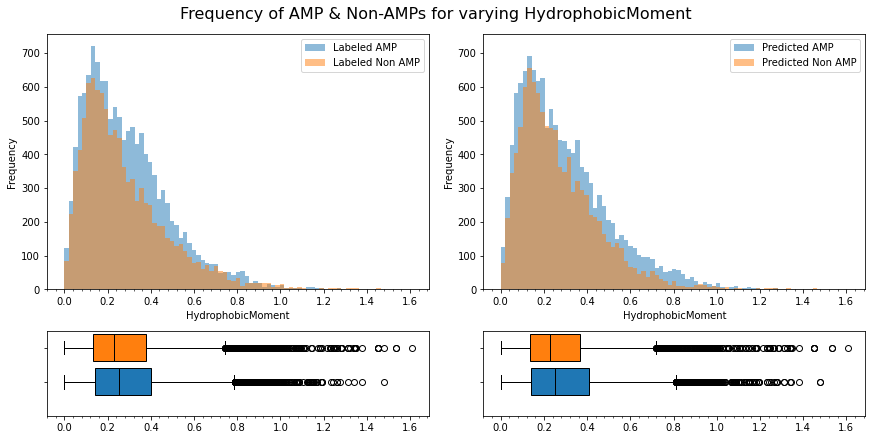

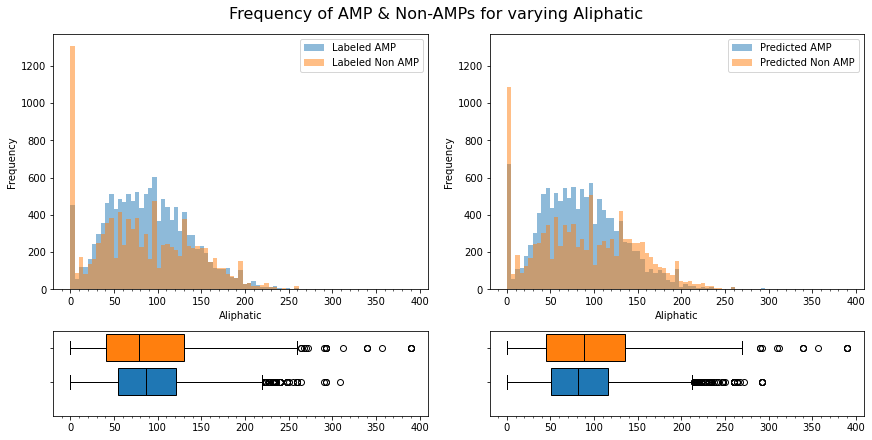

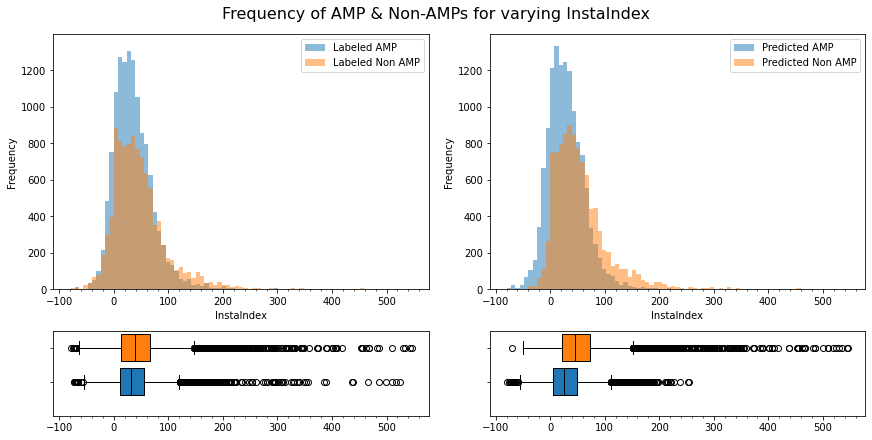

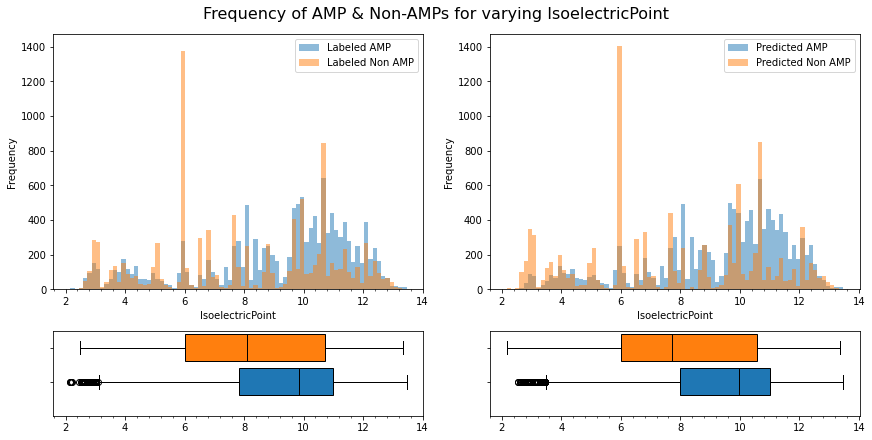

In [ ]:
df = results_pandas_dataframe
metadata_names = [
    'Size',
    'BomanI',
    'NetCharge',
    'HydrophobicRatio',
    'HydrophobicMoment',
    'Aliphatic',
    'InstaIndex',
    'IsoelectricPoint']
for metadata in metadata_names:
    plot_metadata_data(df, [metadata], sub_plot_size=(6,3));
    plt.savefig(results_analysis_path + "/"+ metadata)

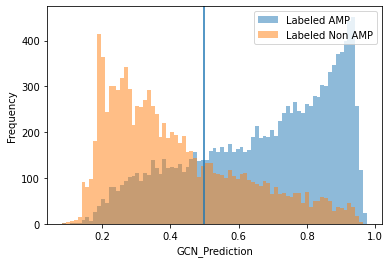

In [ ]:
df = results_pandas_dataframe
amp_values_labeled = []
non_amp_values_labeled = []
for k, value in enumerate(df["GCN_Prediction"]):
    if round(df["Label"][k]):
        amp_values_labeled.append(value)
    else:
        non_amp_values_labeled.append(value)

bins = np.linspace(
    min(min(amp_values_labeled), min(non_amp_values_labeled)),
    max(max(amp_values_labeled), max(non_amp_values_labeled)),
    80)

plt.hist(amp_values_labeled, bins, alpha=0.5, label="Labeled" + ' AMP')
plt.hist(non_amp_values_labeled, bins, alpha=0.5, label="Labeled" + ' Non AMP')
plt.legend(loc='upper right')
plt.ylabel("Frequency")
plt.xlabel("GCN_Prediction")
plt.axvline(x=0.5)
plt.savefig(results_prediction_distributions_save_path)

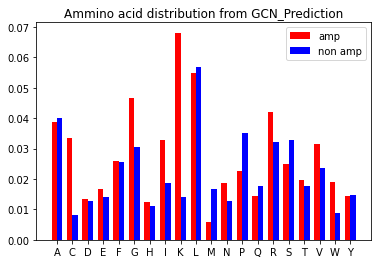

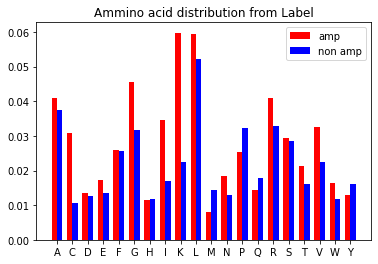

In [ ]:
plot_ammino_acid_distribution(results_pandas_dataframe, "GCN_Prediction");
plot_ammino_acid_distribution(results_pandas_dataframe, "Label");